In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
highPerturbation = pd.read_csv('./highp_finalresults.csv')#, index_col=0)
lowPerturbation = pd.read_csv('./lowp_finalresults.csv')#, index_col=0)

## Primero se realiza un análisis individual de cada sistema para extraer la información

In [3]:
def get_systems_variables(pert_file):
    
    columns=['emestar','rc','qest','sigmag_0','emed','gama','apert','fpert','constmigI','emetal','taugas',\
        'num_planets','mass_planets','mass_efficiency']
    Num_syst = pert_file['ident'].values[-1]+1
    syst_vars = pd.DataFrame(columns=columns)
    for i in range(Num_syst):
        Current_syst = pert_file[pert_file['ident'].values==i]
        planets=np.shape(Current_syst)[0]

        if(planets>0):
            initials=Current_syst[columns[:11]].values[0]
            planets=np.shape(Current_syst)[0]
            row_vals=np.append(initials,planets)

            planet_mass=np.sum(Current_syst['emepla(i)/emet'].values)
            row_vals=np.append(row_vals,planet_mass)

            eff=planet_mass/Current_syst['emed'].values[0]
            row_vals=np.append(row_vals,eff)
        else:
            row_vals=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0])
    
        syst_vars.loc[i]=row_vals
    return syst_vars

#High Perturbation System Analysis
highp_vars = get_systems_variables(highPerturbation)
highp_vars = highp_vars[highp_vars['num_planets'].values!=0]
#Low Perturbation System Analysis
lowp_vars = get_systems_variables(lowPerturbation)
lowp_vars = lowp_vars[lowp_vars['num_planets'].values!=0]

# Luego se procede a entrenar una SVM para cada una de las salidas
## High Perturbation
## Linear Kernel

In [55]:
salidas = ['num_planets','mass_planets','mass_efficiency']
Mode = 1 ## 1 for Highp 0 for Lowp

if Mode==1:
    SVM_Vars= highp_vars
elif Mode==0:
    SVM_Vars= lowp_vars

#Dividing Input and Output Variables
X = SVM_Vars[['emestar','rc','qest','sigmag_0','emed','gama','apert','fpert','constmigI','emetal','taugas']]

#Scaling Input values
scaler = preprocessing.StandardScaler().fit(X)
Xs = scaler.transform(X)

#Iterate on outputs

Cs=np.linspace(0.001,5,num=20)
Res = np.zeros([len(Cs),3])

for j in range(len(salidas)):
    
    #Get Current Output
    Y = SVM_Vars[salidas[j]]
    if j>0:
        Y = np.around(Y.values,decimals=1)*10

    for (c,i) in zip(Cs,range(len(Cs))):
        clf = svm.SVC(kernel='linear', C=c)
        scores = cross_val_score(clf, Xs, Y, cv=5)
        Res[i,j]=np.mean(scores)



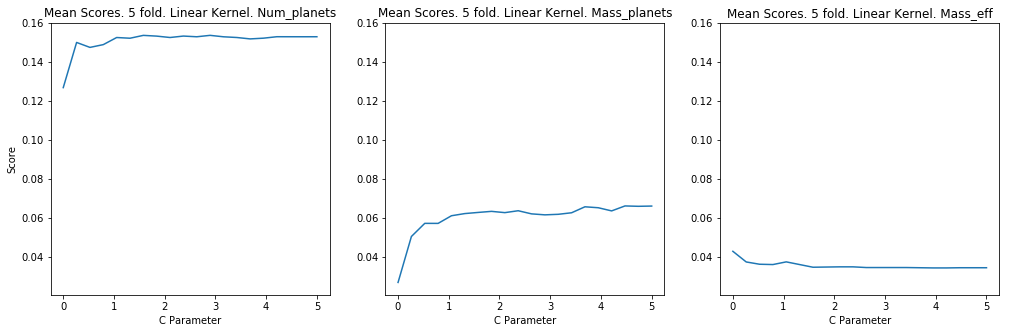

In [64]:
fig = plt.figure(figsize=(17, 5))

ax1=fig.add_subplot(131)
plt.plot(Cs,Res[:,0])
plt.xlabel('C Parameter')
plt.ylabel('Score')
plt.title('Mean Scores. 5 fold. Linear Kernel. Num_planets')

ax2=fig.add_subplot(132,sharey=ax1)
plt.plot(Cs,Res[:,1])
plt.xlabel('C Parameter')
#plt.ylabel('Score')
plt.title('Mean Scores. 5 fold. Linear Kernel. Mass_planets')

ax3=fig.add_subplot(133,sharey=ax1)
plt.plot(Cs,Res[:,2])
plt.xlabel('C Parameter')
#plt.ylabel('Score')
plt.title('Mean Scores. 5 fold. Linear Kernel. Mass_eff')

## Gaussian Kernel

In [67]:
#Iterate on outputs

Cs = 1 #np.linspace(0.001,5,num=20)
Gammas = np.linspace(0.001,5,num=20)
Res_gauss = np.zeros([len(Gammas),3])

for j in range(len(salidas)):
    
    #Get Current Output
    Y = SVM_Vars[salidas[j]]+
    if j>0:
        Y = np.around(Y.values,decimals=1)*10

    for (g,i) in zip(Gammas,range(len(Gammas))):
        clf = svm.SVC(kernel='rbf', C=Cs, gamma=g)
        scores = cross_val_score(clf, Xs, Y, cv=5)
        Res_gauss[i,j]=np.mean(scores)

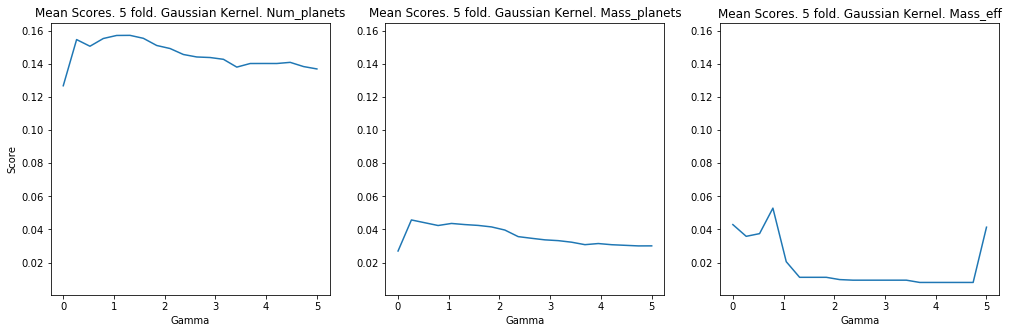

In [68]:
fig = plt.figure(figsize=(17, 5))

ax1=fig.add_subplot(131)
plt.plot(Gammas,Res_gauss[:,0])
plt.xlabel('Gamma')
plt.ylabel('Score')
plt.title('Mean Scores. 5 fold. Gaussian Kernel. Num_planets')

ax2=fig.add_subplot(132,sharey=ax1)
plt.plot(Gammas,Res_gauss[:,1])
plt.xlabel('Gamma')
#plt.ylabel('Score')
plt.title('Mean Scores. 5 fold. Gaussian Kernel. Mass_planets')

ax3=fig.add_subplot(133,sharey=ax1)
plt.plot(Gammas,Res_gauss[:,2])
plt.xlabel('Gamma')
#plt.ylabel('Score')
plt.title('Mean Scores. 5 fold. Gaussian Kernel. Mass_eff')